In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [6]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
class_names = data.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Decision Tree Accuracy: 0.9473684210526315


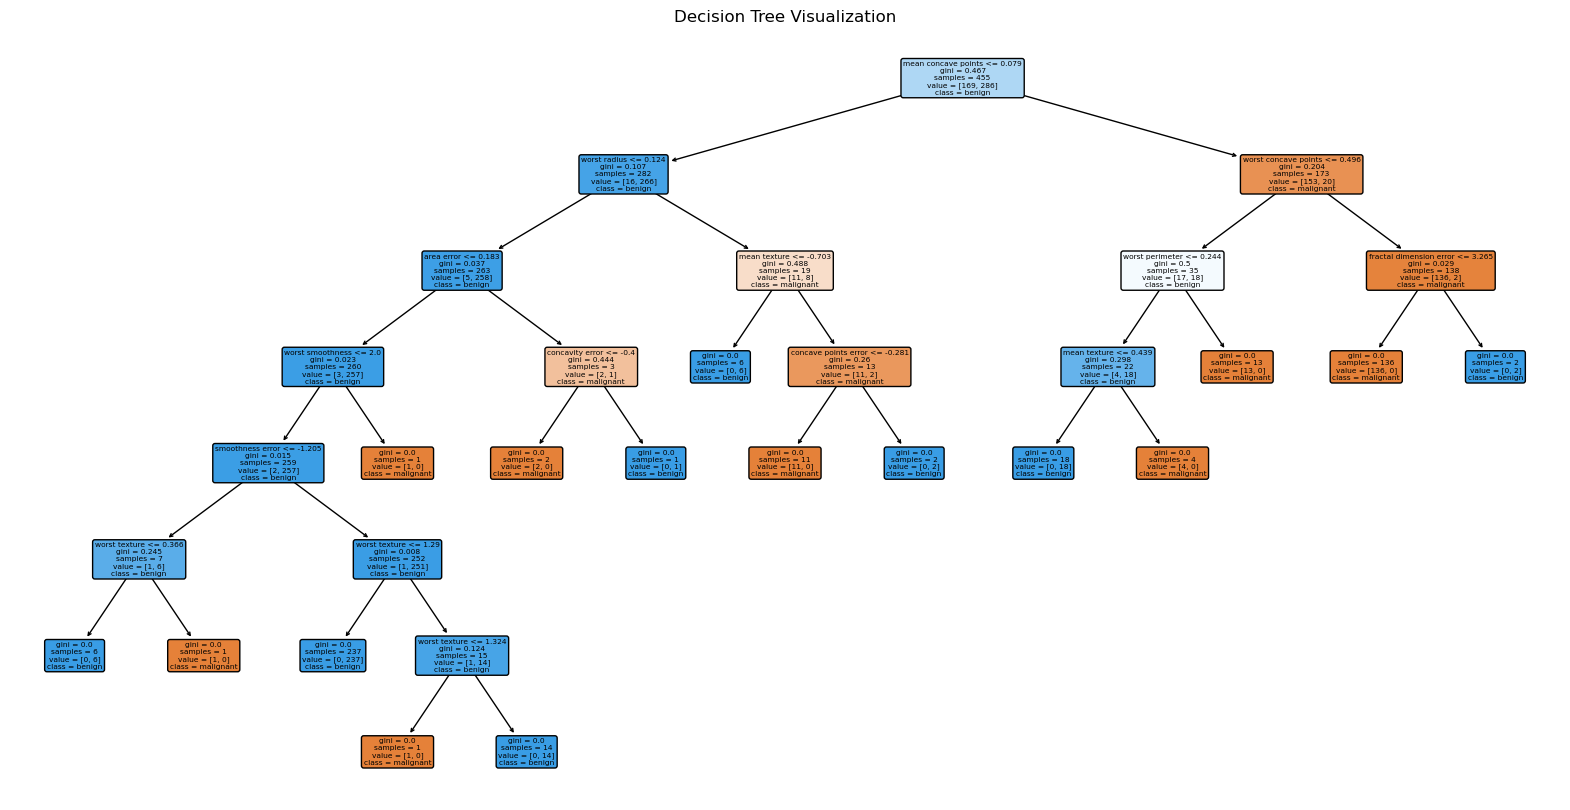

In [7]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Visualize using plot_tree (NO Graphviz needed)
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


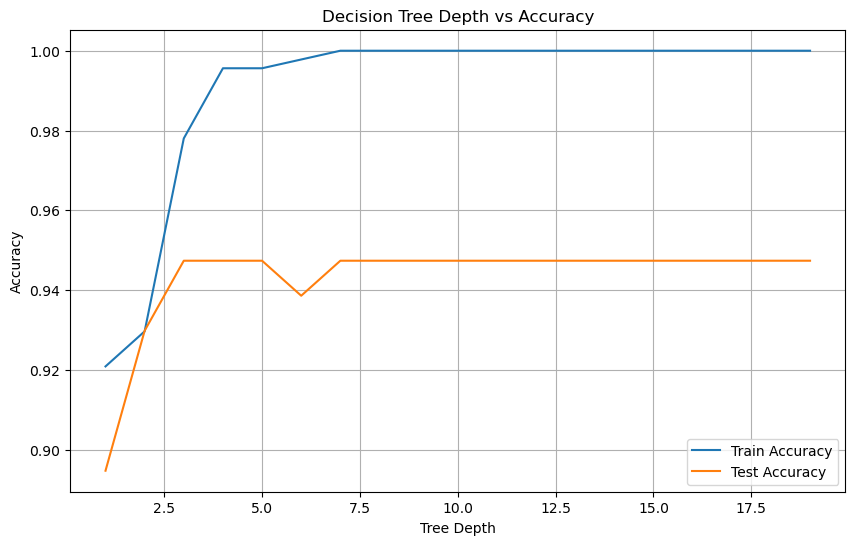

In [8]:
train_acc, test_acc = [], []
depths = range(1, 20)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

# Plot depth vs accuracy
plt.figure(figsize=(10,6))
plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9649122807017544


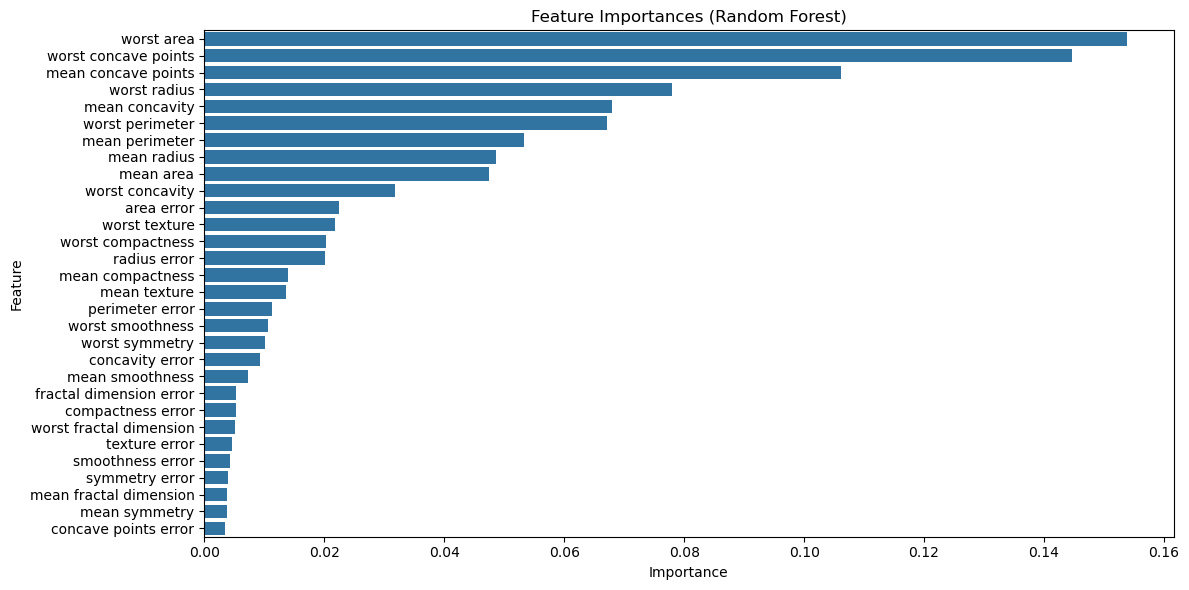

In [10]:
# Feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [11]:
# Cross-validation scores
dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=4), X, y, cv=10)
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=10)

print("Decision Tree CV Accuracy: %.3f ± %.3f" % (dt_cv_scores.mean(), dt_cv_scores.std()))
print("Random Forest CV Accuracy: %.3f ± %.3f" % (rf_cv_scores.mean(), rf_cv_scores.std()))


Decision Tree CV Accuracy: 0.912 ± 0.030
Random Forest CV Accuracy: 0.961 ± 0.032
